In [7]:
# Load mock data
import featuretools as ft
data = ft.demo.load_mock_customer()

In [8]:
# Split mock data into dfs
customers_df = data['customers']
print('sample of customers_df')
print(customers_df.sample(5))

sessions_df = data['sessions']
print('sample of sessions_df')
print(sessions_df.sample(5))

transactions_df = data['transactions']
print('sample of transactions_df')
print(transactions_df.sample(5))

sample of customers_df
   customer_id zip_code           join_date date_of_birth
3            4    60091 2011-04-08 20:08:14    2006-08-15
2            3    13244 2011-08-13 15:42:34    2003-11-21
0            1    60091 2011-04-17 10:48:33    1994-07-18
4            5    60091 2010-07-17 05:27:50    1984-07-28
1            2    13244 2012-04-15 23:31:04    1986-08-18
sample of sessions_df
    session_id  customer_id   device       session_start
13          14            1   tablet 2014-01-01 03:28:00
6            7            3   tablet 2014-01-01 01:39:40
1            2            5   mobile 2014-01-01 00:17:20
29          30            5  desktop 2014-01-01 07:27:25
18          19            3  desktop 2014-01-01 04:27:35
sample of transactions_df
     transaction_id  session_id    transaction_time product_id  amount
74              232           5 2014-01-01 01:20:10          1  139.20
231              27          17 2014-01-01 04:10:15          2   90.79
434              36       

In [9]:
# Specify a dictionary with all entities in dataset
entities = {
    'customers': (customers_df, 'customer_id'),
    'sessions': (sessions_df, 'session_id', 'session_start'),
    'transactions': (transactions_df, 'transaction_id', 'transaction_time')
}

# Specify how entities are related
relationships = [
    # Link 'customer_id' in 'sessions' to 'customer_id' in 'transactions'
    ('sessions', 'session_id', 'transactions', 'session_id'),
    # Link 'customer_id' in 'customers' to 'customer_id' in 'sessions'
    ('customers', 'customer_id', 'sessions', 'customer_id')]

In [22]:
# Run Deep Feature Synthesis target_entity='sessions'
feature_matrix_sessions, session_features_defs = ft.dfs(
    entities=entities,
    relationships=relationships,
    target_entity='sessions')
print('the feature_matrix_sessions')
print(feature_matrix_sessions.sample(5))

the feature_matrix_sessions
            customer_id   device  COUNT(transactions)  \
session_id                                              
1                     2  desktop                   16   
13                    4   mobile                   12   
30                    5  desktop                   14   
17                    2   tablet                   13   
3                     4   mobile                   15   

            MAX(transactions.amount)  MEAN(transactions.amount)  \
session_id                                                        
1                             141.66                  76.813125   
13                            142.28                  78.963333   
30                            144.53                  87.223571   
17                            118.85                  77.304615   
3                             147.73                  88.600000   

            MIN(transactions.amount)  MODE(transactions.product_id)  \
session_id                     

In [23]:
print('the session_features_defs[18]')
print(session_features_defs[18])

the session_features_defs[18]
<Feature: MODE(transactions.WEEKDAY(transaction_time))>


the session_features_defs[18] lineage graphs


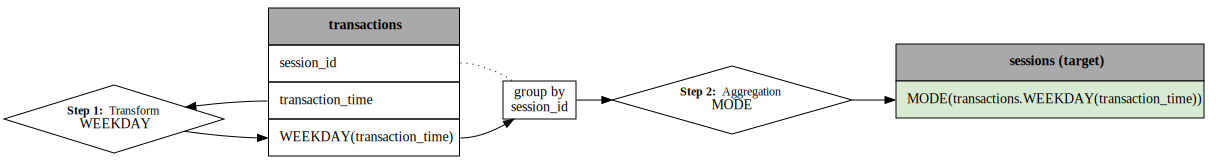

In [28]:
print('the session_features_defs[18] lineage graphs')
ft.graph_feature(feature=session_features_defs[18], to_file='../viz/demo_session-features-def18_graphviz.png')

In [30]:
print('the session_features_defs[18] describe')
print(ft.describe_feature(session_features_defs[18]))

the session_features_defs[18] describe
The most frequently occurring value of the day of the week of the "transaction_time" of all instances of "transactions" for each "session_id" in "sessions".
